In [1]:
import numpy as np
import matplotlib.pyplot as plt

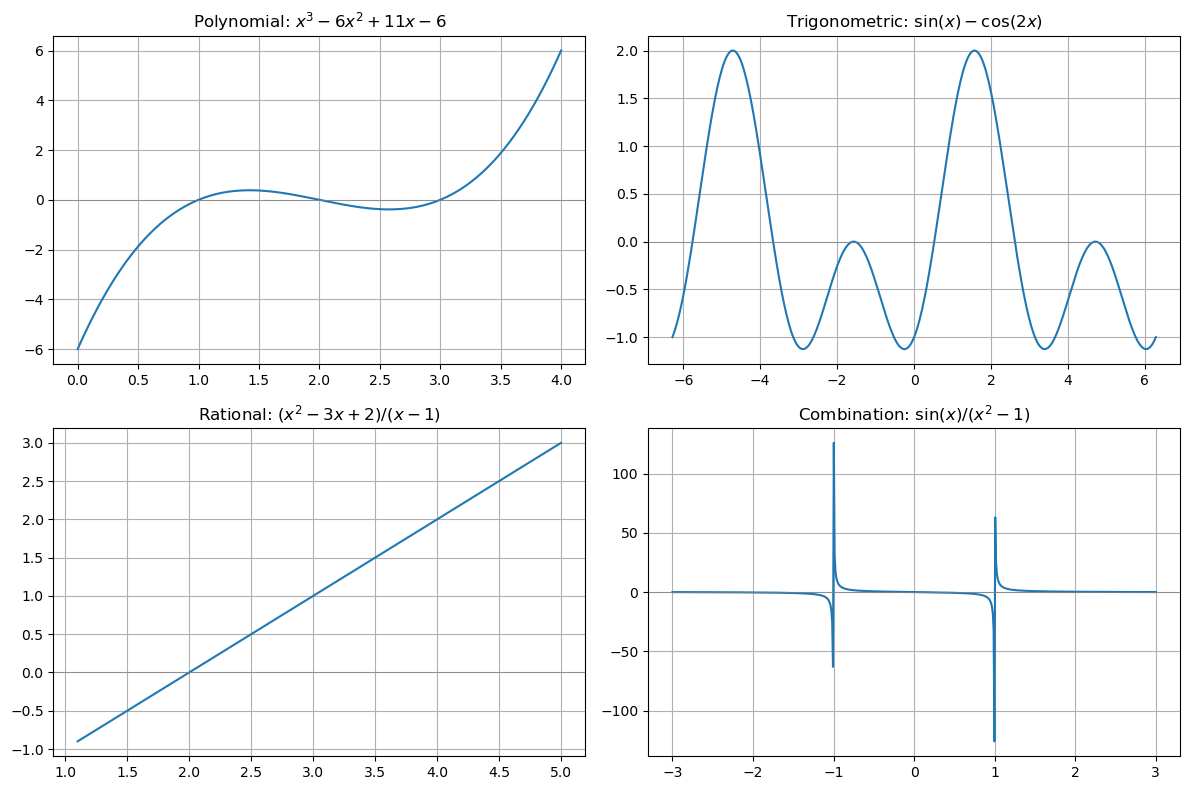

In [2]:
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

def g(x):
    return np.sin(x) - np.cos(2*x)

def h(x):
    return np.where(x == 1, np.nan, (x**2 - 3*x + 2) / (x - 1)) # for the discontinuity at x=1

def k(x):
    return np.where((x == 1) | (x == -1), np.nan, np.sin(x) / (x**2 - 1)) # for the singularity at x=-1 and x=1

# Define the intervals
x1 = np.linspace(0, 4, 400)
x2 = np.linspace(-2*np.pi, 2*np.pi, 400)
x3 = np.linspace(1.1, 5, 400)  # start just after the discontinuity at x = 1
x4 = np.linspace(-3, 3, 600) # get intervals between 1 and -1 or greater than 1
x4 = x4[(x4 != 1) & (x4 != -1)]  # avoid the singularities at x = -1 and x = 1

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x1, f(x1))
plt.title('Polynomial: $x^3 - 6x^2 + 11x - 6$')
plt.axhline(0, color='gray', lw=0.5)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x2, g(x2))
plt.title('Trigonometric: $\sin(x) - \cos(2x)$')
plt.axhline(0, color='gray', lw=0.5)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x3, h(x3))
plt.title('Rational: $(x^2 - 3x + 2)/(x - 1)$')
plt.axhline(0, color='gray', lw=0.5)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x4, k(x4))
plt.title('Combination: $\sin(x)/(x^2 - 1)$')
plt.axhline(0, color='gray', lw=0.5)
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
def newtons_method(f, df, x0, epsilon=1e-6, theta=1e-6, N=1000):
    x = x0
    for i in range(N):
        fx = f(x)
        if abs(fx) < epsilon:
            return x, i
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Derivative is zero. No solution found.")
        dx = fx / dfx
        x_new = x - dx
        if abs(dx) < theta:
            return x_new, i
        x = x_new
    return x, N

def f_derivative(x):
    return 3*x**2 - 12*x + 11

roots = dict()
initial_guesses = [0, 2, 3, 5]  # different values of x0
for x0 in initial_guesses:
    root, iterations = newtons_method(f, f_derivative, x0)
    roots[x0] = [root, iterations]

for key, values in roots.items():
    print(f"For x0 = {key}, method converges to the root x = {int(values[0])} after {values[1]} iterations")

For x0 = 0, method converges to the root x = 0 after 6 iterations
For x0 = 2, method converges to the root x = 2 after 0 iterations
For x0 = 3, method converges to the root x = 3 after 0 iterations
For x0 = 5, method converges to the root x = 3 after 7 iterations


In [4]:
def derivative_approximation(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def newtons_method_approx_derivative(f, x0, dertivative_app, h=1e-5, epsilon=1e-6, theta=1e-6, N=1000):
    x = x0
    for i in range(N):
        fx = f(x)
        if abs(fx) < epsilon:
            return x, i
        dfx = dertivative_app(f, x, h)
        if dfx == 0:
            # it happens sometime
            raise ValueError("Derivative is zero. No solution found.")
        dx = fx / dfx
        x_new = x - dx
        if abs(dx) < theta:
            return x_new, i
        x = x_new
    return x, N

initial_guesses = [1, 3, 2, 0.1]
functions = [f, g, h, k] 

approx_roots = dict()
for func, x0 in zip(functions, initial_guesses):
    root, iterations = newtons_method_approx_derivative(func, x0, derivative_approximation)
    approx_roots[func.__name__] = [x0, root, iterations]

for key, values in approx_roots.items():
    print(f"For function = {key}, initial guess = {values[0]} method converges to the root x = {int(values[1])} after {values[2]} iterations")

For function = f, initial guess = 1 method converges to the root x = 1 after 0 iterations
For function = g, initial guess = 3 method converges to the root x = 2 after 4 iterations
For function = h, initial guess = 2 method converges to the root x = 2 after 0 iterations
For function = k, initial guess = 0.1 method converges to the root x = 0 after 2 iterations


In [5]:
def symmetric_derivative_approximation(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

approx_roots = dict()
for func, x0 in zip(functions, initial_guesses):
    root, iterations = newtons_method_approx_derivative(func, x0, symmetric_derivative_approximation)
    approx_roots[func.__name__] = [x0, root, iterations]

for key, values in approx_roots.items():
    print(f"For function = {key}, initial guess = {values[0]} method converges to the root x = {int(values[1])} after {values[2]} iterations")

For function = f, initial guess = 1 method converges to the root x = 1 after 0 iterations
For function = g, initial guess = 3 method converges to the root x = 2 after 4 iterations
For function = h, initial guess = 2 method converges to the root x = 2 after 0 iterations
For function = k, initial guess = 0.1 method converges to the root x = 0 after 2 iterations


In [8]:
# different x0 values

initial_guesses_new = [5, 7, 2.5, 8.6]nn                                                                             

approx_roots = dict()
for func, x0 in zip(functions, initial_guesses_new):
    root, iterations = newtons_method_approx_derivative(func, x0, symmetric_derivative_approximation)
    approx_roots[func.__name__] = [x0, root, iterations]

for key, values in approx_roots.items():
    print(f"For function = {key}, initial guess = {values[0]} method converges to the root x = {int(values[1])} after {values[2]} iterations")

For function = f, initial guess = 5 method converges to the root x = 3 after 7 iterations
For function = g, initial guess = 7 method converges to the root x = 6 after 3 iterations
For function = h, initial guess = 2.5 method converges to the root x = 1 after 1 iterations
For function = k, initial guess = 8.6 method converges to the root x = 9 after 3 iterations
